# Core data manipulation and scientific computing libraries

In [2]:
import pandas as pd
import numpy as np

# Visulization Libraries

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for Machine Learning tasks

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [7]:
iris = load_iris()

# Extract features (X) and target (y)

In [9]:
X = iris.data
y = iris.target

# Get feature names and target names

In [11]:
feature_names = iris.feature_names
target_names = iris.target_names

In [12]:
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Features Names:", feature_names)
print("Target Names:", target_names)

Features (X) shape: (150, 4)
Target (y) shape: (150,)
Features Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


# Create a Pandas DataFrame for exploration

In [14]:
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

# Map numerical species to their names fpor better readability

In [16]:
df['species_name'] = df['species'].map({i: name for i, name in enumerate(target_names)})

In [17]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [18]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [19]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [20]:
print("\nSpecies distribution:")
print(df['species_name'].value_counts())


Species distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# Pairplot to visualize relationships between all pairs of features, colored by species


Pairplot showing relationships between features, colored by species:


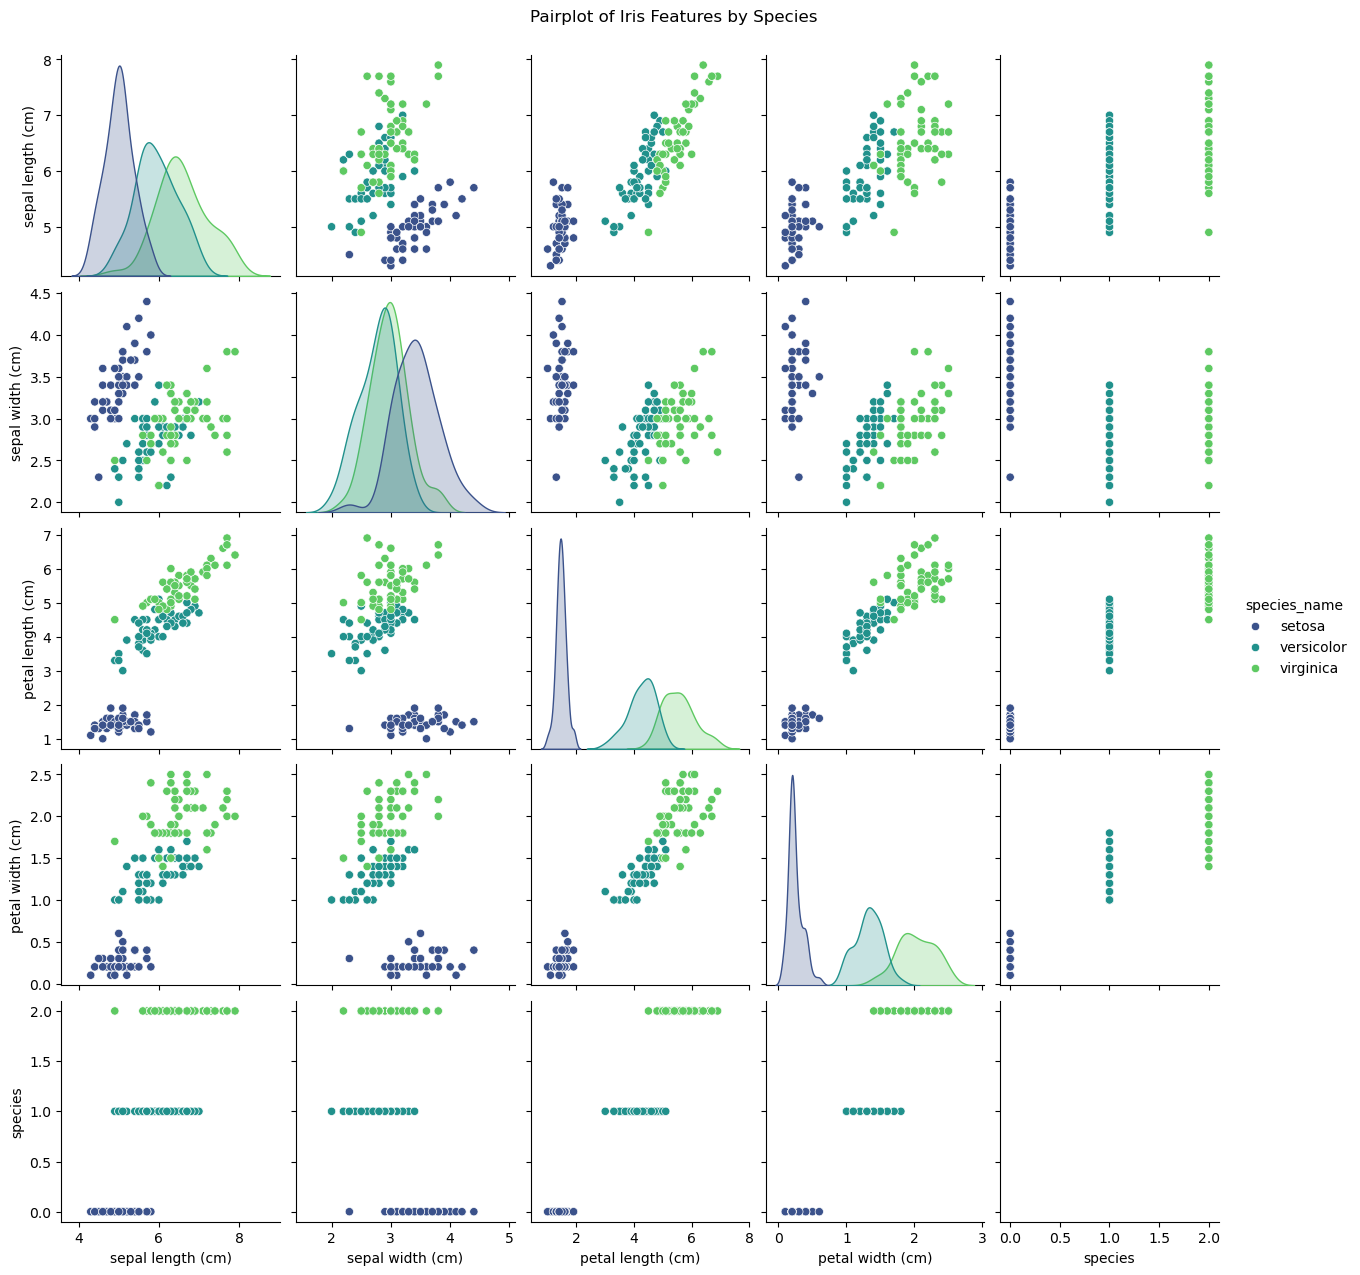

In [22]:
print("\nPairplot showing relationships between features, colored by species:")
sns.pairplot(df, hue='species_name', palette='viridis')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

# Histogram for each feature


Histograms for each feature:


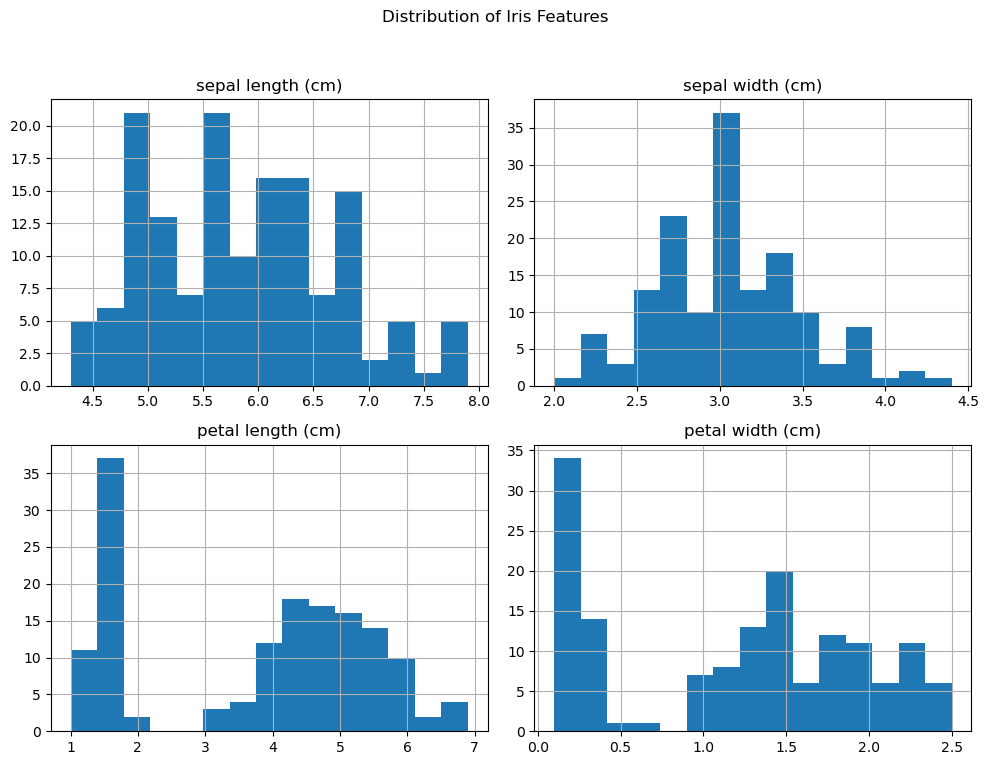

In [24]:
print("\nHistograms for each feature:")
df.drop('species', axis=1).hist(bins=15, figsize=(10,8),layout=(2, 2))
plt.suptitle('Distribution of Iris Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box plots to show feature distribution per species


Box plots of features per species:


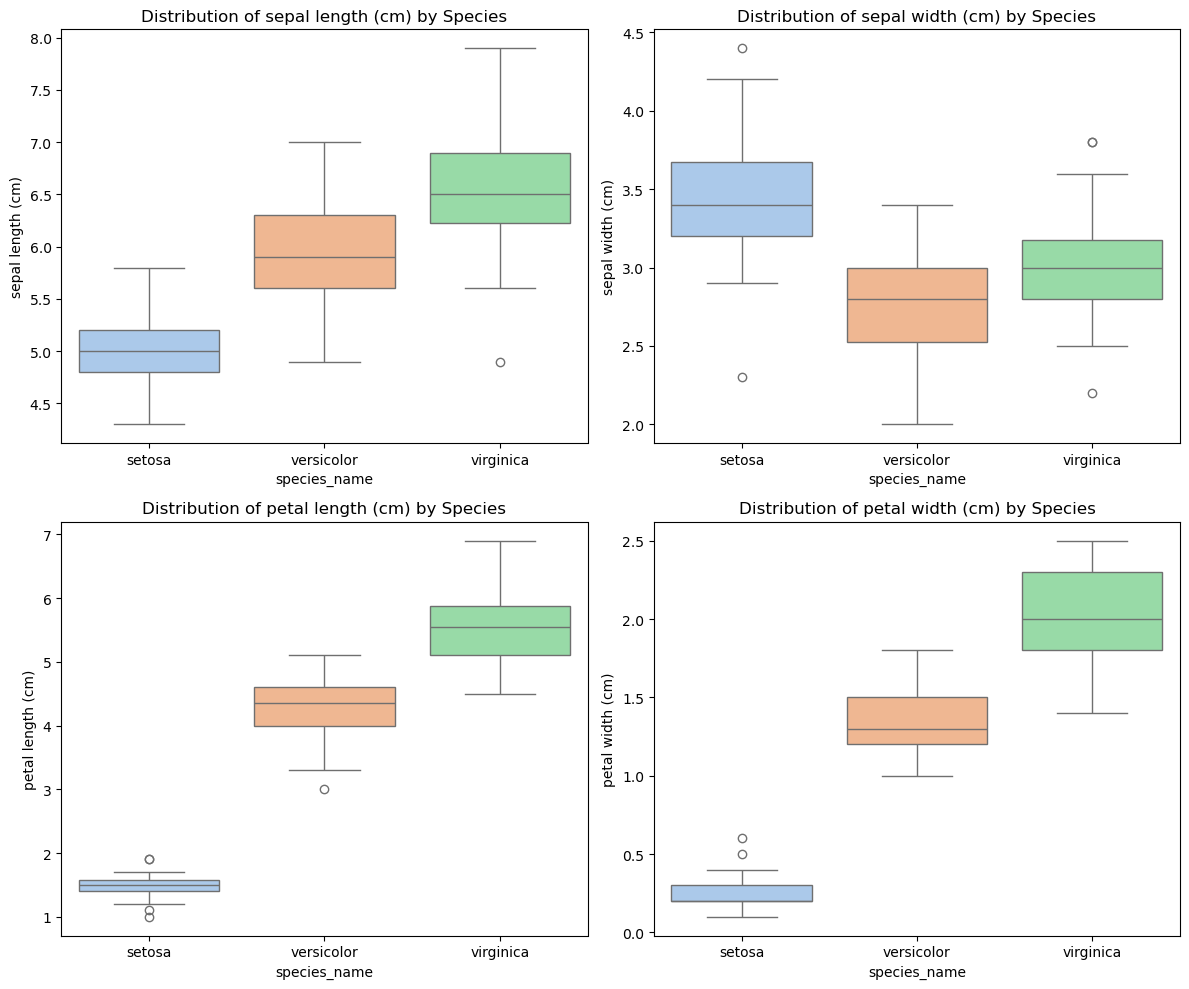

In [44]:
print("\nBox plots of features per species:")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(feature_names):
    row = i // 2
    col = i % 2
    sns.boxplot(x='species_name',y=feature, data=df, ax=axes[row, col],palette='pastel', hue='species_name', legend=False)
    axes[row,col].set_title(f'Distribution of {feature} by Species')
plt.tight_layout()
plt.show()

# Split the data into training and testing sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


# Check distribution in train and test

In [50]:
print("\nTraining set species distribution:")
print(pd.Series(y_test).map({i: name for i, name in enumerate(target_names)}).value_counts())


Training set species distribution:
virginica     15
versicolor    15
setosa        15
Name: count, dtype: int64


# Model Training: Decision Tree Classifier

In [62]:
dt_classifier = DecisionTreeClassifier(random_state=42)


# Train the model using the training data

In [65]:
print("Training the Decision Tree Classifier...")
dt_classifier.fit(X_train, y_train)
print("Model training complete.")

Training the Decision Tree Classifier...
Model training complete.


# Visualizing the Decision Tree

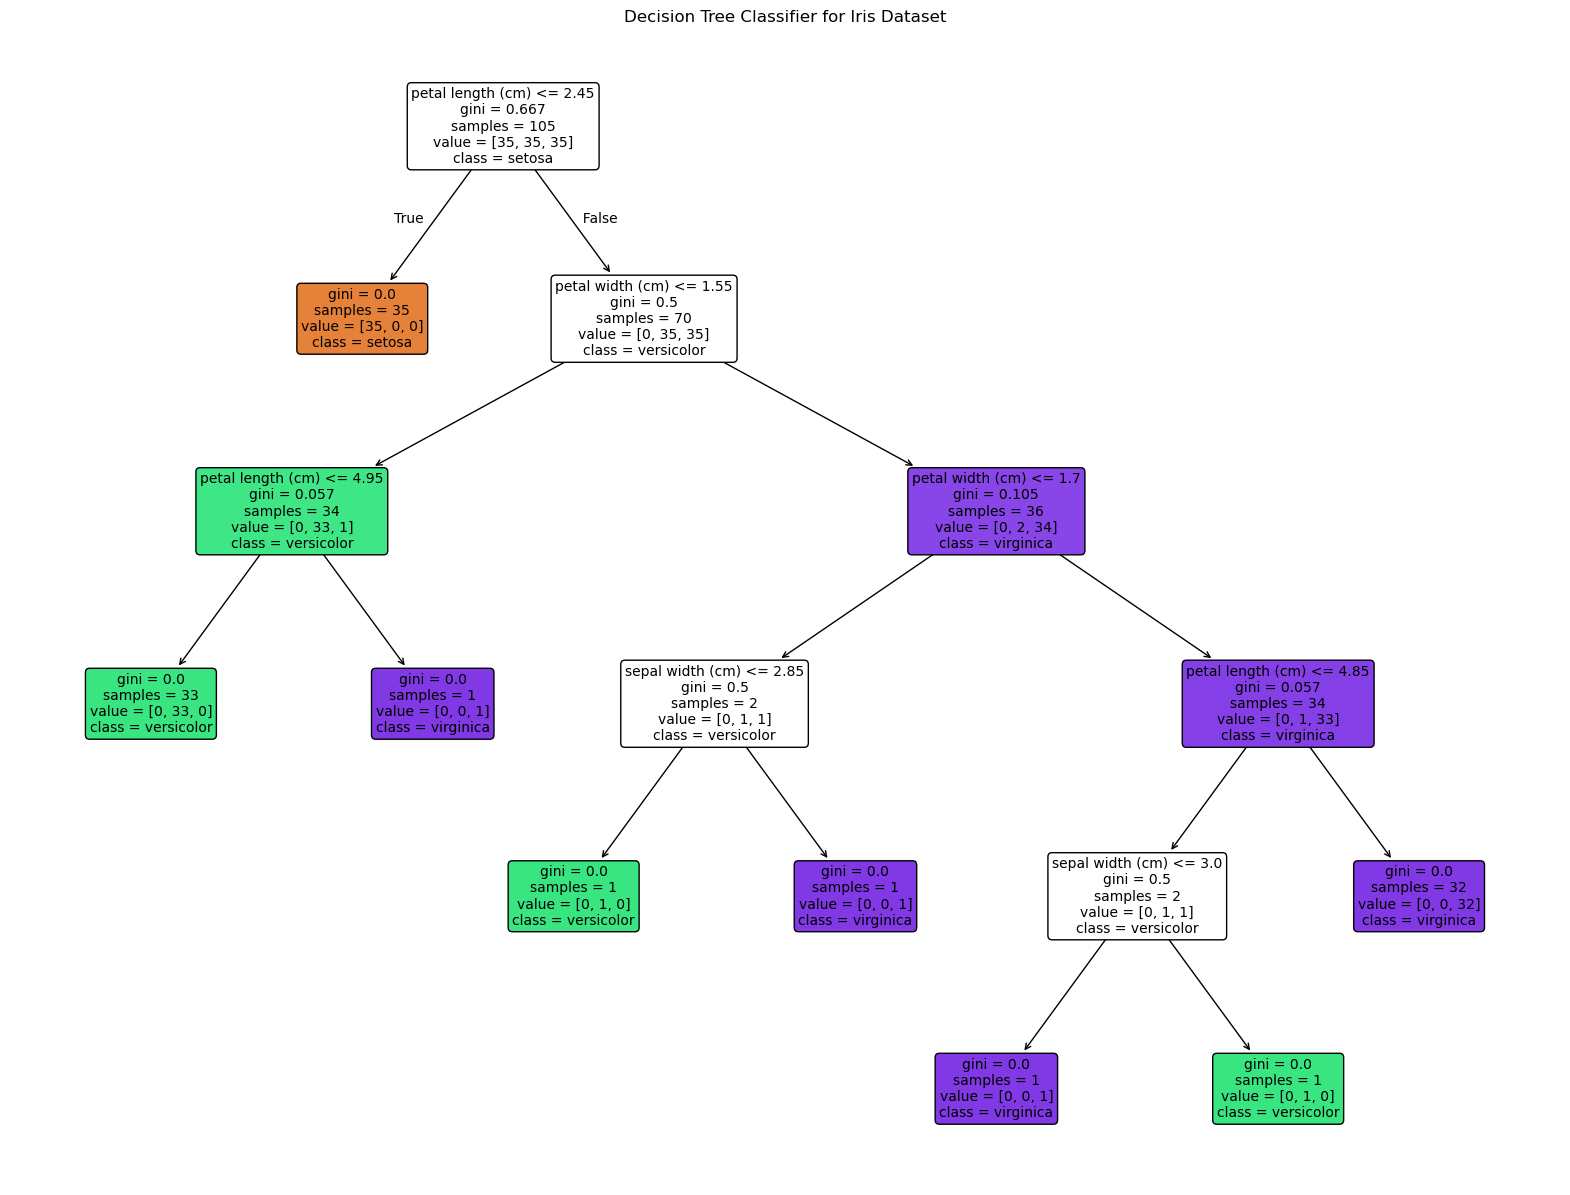

In [68]:
plt.figure(figsize=(20, 15))
plot_tree(dt_classifier, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Classifier for Iris Dataset')
plt.show()

# Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:4f}\n")

In [71]:
y_pred = dt_classifier.predict(X_test)
print("Model Evaluation:\n")

Model Evaluation:



In [76]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [78]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n")
print(cm)


Confusion Matrix:

[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


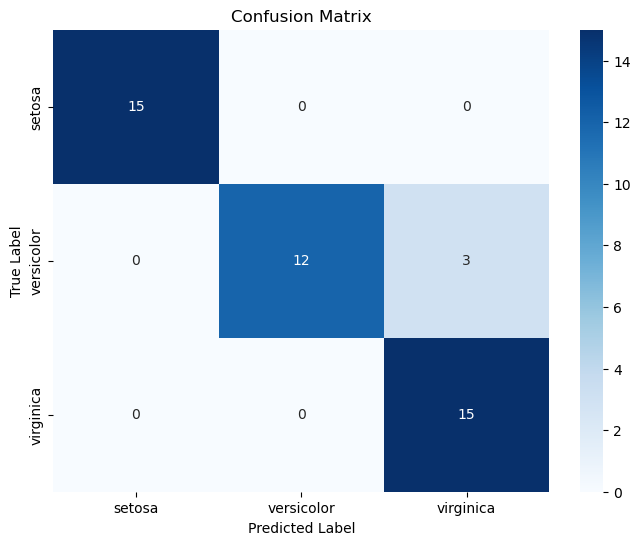

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names,yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Cross-Validation

In [86]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt_classifier, X, y, cv=kf, scoring='accuracy')

print(f"\nCross-validation Accuracy Scores (5-fold): {cv_scores}")
print(f"Mean Cross-validation Accuracy:{cv_scores.mean():4f}")
print(f"Standard Deviation of Cross-validation Accuracy:{cv_scores.std():.4f}")


Cross-validation Accuracy Scores (5-fold): [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean Cross-validation Accuracy:0.953333
Standard Deviation of Cross-validation Accuracy:0.0267


# Conclusion